In [1]:
import pandas as pd

In [2]:
file_path = "cleaned_data.csv"
df = pd.read_csv(file_path,on_bad_lines="skip")

df.head()

,password,length,upper_case_count,lower_cases_count,digit_count,special_count,strength
0,kzde5577,8.0,0.0,4.0,4.0,0.0,1.0
1,kino3434,8.0,0.0,4.0,4.0,0.0,1.0
2,visi7k1yr,9.0,0.0,7.0,2.0,0.0,1.0
3,megzy123,8.0,0.0,5.0,3.0,0.0,1.0
4,lamborghin1,11.0,0.0,10.0,1.0,0.0,1.0


In [3]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)

# ct = ColumnTransformer([("only numeric",StandardScaler(),x.columns)],remainder='passthrough')

# x_train = ct.fit_transform(x_train)
# x_test = ct.transform(x_test)

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

print(x_train.shape)
print(x_test.shape)
x

(502230, 5)
(167410, 5)


,length,upper_case_count,lower_cases_count,digit_count,special_count
0,8.0,0.0,4.0,4.0,0.0
1,8.0,0.0,4.0,4.0,0.0
2,9.0,0.0,7.0,2.0,0.0
3,8.0,0.0,5.0,3.0,0.0
4,11.0,0.0,10.0,1.0,0.0
...,...,...,...,...,...
669635,10.0,0.0,6.0,4.0,0.0
669636,9.0,0.0,8.0,1.0,0.0
669637,12.0,0.0,6.0,6.0,0.0
669638,9.0,0.0,7.0,2.0,0.0


In [4]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(hidden_layer_sizes=(16,16),max_iter=300)
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=300)

In [5]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(x_test)
print("The accuracy : {}".format(accuracy_score(y_test,y_pred)*100))
print(
    x_test
)
print(y_pred)


The accuracy : 100.0
[[ 7.  0.  6.  1.  0.]
 [ 9.  0.  1.  8.  0.]
 [ 6.  0.  5.  1.  0.]
 ...
 [10.  0.  7.  3.  0.]
 [ 8.  0.  2.  6.  0.]
 [16.  8.  2.  6.  0.]]
[0. 1. 0. ... 1. 1. 2.]


<Axes: >

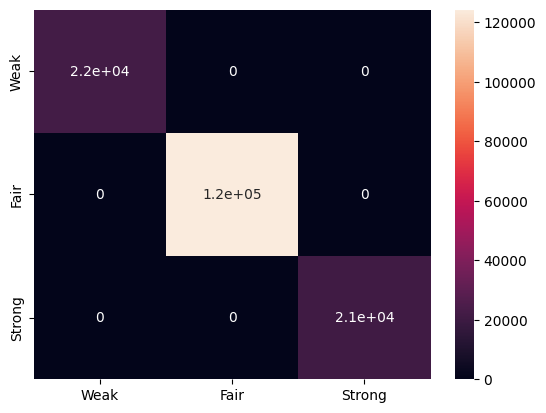

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
df = pd.DataFrame(cm,index=["Weak","Fair","Strong"],columns=["Weak","Fair","Strong"])
sns.heatmap(data=df,annot=True,)

In [10]:
from password_helper import proceed_password as prpwd

def generate_password_score(password):
    each_x = prpwd(password)[1:-1]
    y_temp = model.predict([each_x])
    return y_temp[0]

In [11]:
print(x.columns)

data = [
    "Sio644@ti7Oti7Oti7O",
    "apple",
    "banana",
    "CuCumb3r",
    "2",
    "1241"
]

for index in range(len(data)):
    generate_password_score(data[index])





Index(['length', 'upper_case_count', 'lower_cases_count', 'digit_count',
       'special_count'],
      dtype='object')
For Sio644@ti7Oti7Oti7O, data :[19, 4, 8, 6, 1]
Result : [2.]
For apple, data :[5, 0, 5, 0, 0]
Result : [0.]
For banana, data :[6, 0, 6, 0, 0]
Result : [0.]
For CuCumb3r, data :[8, 2, 5, 1, 0]
Result : [1.]
For 2, data :[1, 0, 0, 1, 0]
Result : [0.]
For 1241, data :[4, 0, 0, 4, 0]
Result : [0.]


In [12]:
#saving the model
import joblib
joblib.dump(model, 'password_strength_model.pkl')


['password_strength_model.pkl']